In [2]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -o -q "UCI HAR Dataset.zip"
!rm -rf __MACOSX
!find "UCI HAR Dataset" -name ".DS_Store" -delete
print("Data downloaded and extracted successfully.")


Data downloaded and extracted successfully.


In [3]:
import numpy as np
import pandas as pd

def load_data():
    path = "UCI HAR Dataset/"

    features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])
    feature_names = features['feature'].tolist()

    feature_names = [f"{name}_{i}" if feature_names.count(name) > 1 else name for i, name in enumerate(feature_names)]

    X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
    X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)

    y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['Activity'])
    y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['Activity'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()

print(f"Data loaded: {X_train.shape}, {X_test.shape}")


Data loaded: (7352, 561), (2947, 561)


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.values.ravel())
y_test = encoder.transform(y_test.values.ravel())

print("Data preprocessing completed.")


Data preprocessing completed.


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, Reshape

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Reshape((1, -1)),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Model built successfully.")
model.summary()


Model built successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 559, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 279, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 17856)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │       3,581,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,584,512 (13.67 MB)

 Trainable params: 3,584,512 (13.67 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 30

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32)

print("Training completed.")


Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.6557 - loss: 0.9294 - val_accuracy: 0.9179 - val_loss: 0.2188
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.9484 - loss: 0.1625 - val_accuracy: 0.9362 - val_loss: 0.1768
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.9662 - loss: 0.1034 - val_accuracy: 0.9352 - val_loss: 0.1886
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - accuracy: 0.9719 - loss: 0.0854 - val_accuracy: 0.9430 - val_loss: 0.1664
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.9801 - loss: 0.0614 - val_accuracy: 0.9433 - val_loss: 0.1863
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9830 - loss: 0.0496 - val_accuracy: 0.9555 - val_loss: 0.1618
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9826 - loss: 0.0467 - val_accuracy: 0.9498 - val_loss: 0.1895
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9885 - loss: 0.0385 

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       496
           1       0.95      0.97      0.96       471
           2       0.98      0.92      0.95       420
           3       0.98      0.80      0.88       491
           4       0.84      0.98      0.91       532
           5       0.99      0.99      0.99       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



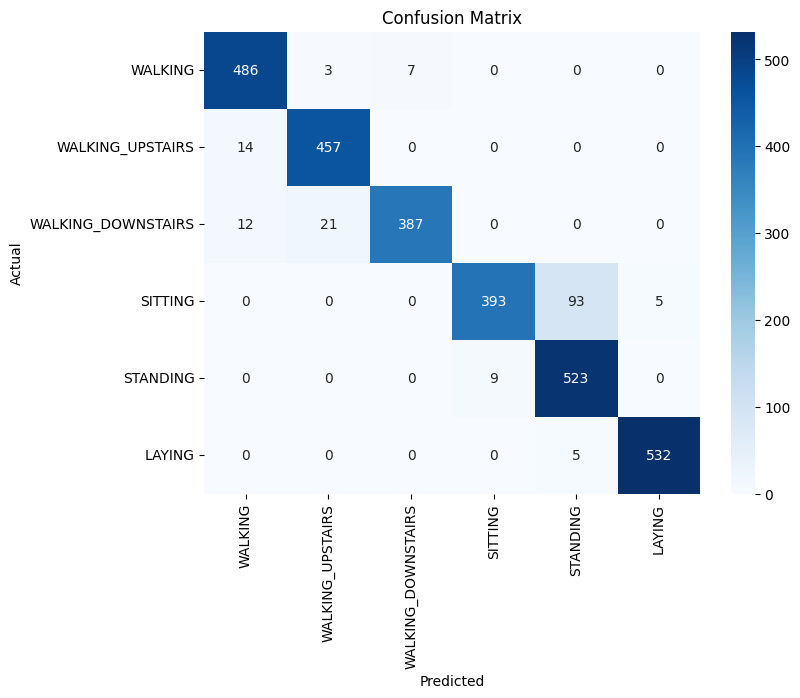

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# الحصول على التنبؤات
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# طباعة تقرير التصنيف
print(classification_report(y_test, y_pred_classes))

# رسم مصفوفة الارتباك
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=activity_labels.values(), yticklabels=activity_labels.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9386 - loss: 0.4623
Test Accuracy: 94.27%


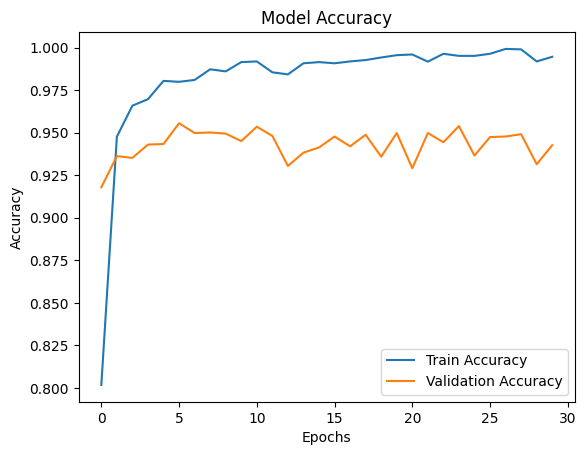

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [16]:
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# Select a sample for prediction
sample_index = 0  # Change index to test other samples
sample = X_test[sample_index].reshape(1, X_test.shape[1], 1)

# Make prediction
prediction = model.predict(sample)
predicted_class = np.argmax(prediction) + 1  # Labels in dataset start from 1, not 0

# Print results
print(f"Predicted Activity: {activity_labels[predicted_class]}")
print(f"Actual Activity: {activity_labels[y_test[sample_index]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Activity: STANDING
Actual Activity: SITTING
